<a href="https://colab.research.google.com/github/dnguyend/VARsMA/blob/master/VARsMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Autoregressive with scalar Moving Average Model
## Introduction.
This notebook explains the underlying idea of the the paper "Vector Autoregressive with scalar Moving Average Model". The main ideas are the following

* When the Autoregressive and the Moving Average polynomials commute with each other, there is a simple formula for the conditional likelihood function.
* The formula is a Generalized Linear Regression type formula, with the inner product given by the Toeplitz matrix of the moving average process.
* There is a simple inversion formula for the Toeplitz matrix using the Woodbury Matrix Identity.  The inversion involves a convolution with the invert of the MA polynomial, and an inversion of a smaller matrix of size $k\times k$ ($k$ is the dimension of vector.) 
* This inversion formula is related to the Borodin-Okounkov formula in operator algebra.
* Since the AR coefficients are given by GLS for a fixed MA polynomial, we have a close form of the likelihood function for each set of MA coefficients. We can optimize over the MA coefficients to estimate the model parameters.

We present the python code in our github directory. We also have R and C++ codes which we plan to make open source in the future.

The AR part of the model is dense. A reduced rank AR model will be presented in future work. This model is a simple extension of the Vector Autogressive Model widely use in Time Series Analysis. This model should be competitive versus the traditional VAR model if the real world data contains a moving average component, even if the MA component is not scalar.

#TL;DR:
Anywhere we use a Vector Autoregressive Model, we should try VARsMA. At the cost of a few parameters it could deal with moving average effect. The package is open source and easy to use.



## Model and Likelihood function
Let
$\newcommand{btheta}{\boldsymbol{\theta}}\newcommand{bOmega}{\boldsymbol{\Omega}}\newcommand{bPhi}{\boldsymbol{\Phi}}\newcommand{bZ}{\boldsymbol{Z}} \newcommand{bX}{\boldsymbol{X}}\newcommand{bXtheta}{\boldsymbol{X}_{\theta}}\newcommand{ThetaT}{\Theta_T}
\btheta(L) = 1 + \theta_1 L + \cdots + \theta_qL^q$ with $\theta_1,\cdots \theta_q$ are scalars. 

Let $\bPhi(L) = 1 - \Phi_1 L - \cdots - \Phi^p L^q $ be a $k\times $ matrix polynomial. Consider the $k$-dimension vector process
$$X_t = \mu +  X_{t-1} \Phi_1+ X_{t-2} \Phi_2+\cdots+ X_{t-p} \Phi_p +\epsilon_t + \theta_1 \epsilon_{t-1}+\cdots+\theta_q \epsilon_{t-q}
$$
We note when $q = 0$ this is simply the vector autoregressove (VAR) model. When $\btheta$ is also a matrix polynomial we have the general VARMA model.

The conditional likelihood function of the VAR model is well-known:

\begin{equation}\begin{aligned}
\mathscr{L}(\btheta, \mu, \bPhi,\bOmega,X_{p+1}
\cdots X_{T+p}|X_1\cdots X_p) = 
-\frac{Tk}{2}\log(2\pi) -\frac{T}{2}\log(\det(\bOmega))
\\- {k/2} \log(\det\
   (\lambda^{\prime}\lambda+I_q)) -\frac{1}{2}Tr(\bZ^{\prime} \bZ\bOmega^{-1}))
\end{aligned}\end{equation}
Where $\bZ_t = X_t -\mu - X_{t-1} \Phi_1 - X_{t-2} \Phi_2-\cdots- X_{t-p} \Phi_p$. The maximal likelihood is obtained when
$$\Pi =\begin{pmatrix}\mu \\ \Phi_1\\ \Phi_2\\ \vdots \\ \Phi_p \end{pmatrix}_{opt} =(\bX_{LAG}^{\prime}\bX_{LAG})^{-1} \bX_{LAG}^{\prime}\bX $$
and $$\bX_{LAG} = (1, L\bX, L^2\bX,\cdots ,L^p\bX).$$


No such formula exists for general VARMA model but when $\btheta$ is scalar we showed there is a simular formula:
$$\begin{aligned}
\mathscr{L}(\btheta, \mu, \bPhi,\bOmega,X_{p+1}
\cdots X_{T+p}|X_1\cdots X_p) = 
-\frac{Tk}{2}\log(2\pi) -\frac{T}{2}\log(\det(\bOmega))
\\- {k/2} \log(\det\
   (\lambda^{\prime}\lambda+I_q)) -\frac{1}{2}Tr(\bZ^{\prime}\Theta_T^{-1\prime}K(\btheta,T)\Theta_T^{-1} \bZ\bOmega^{-1}))
\end{aligned}$$
with optimal values for coefficients given by

\begin{equation}
\begin{pmatrix}\mu \\ \Phi_1\\ \Phi_2\\ \vdots \\ \Phi_p \end{pmatrix}_{opt} =  (\bX_{\theta,LAG}^{\prime}K\bX_{\theta,LAG})^{-1} \bX_{\theta,LAG}^{\prime}K\bXtheta
\end{equation}
where:
\begin{equation}
\bXtheta = \ThetaT^{-1}\bX
\end{equation}
$$ \bX_{\theta,LAG}= \begin{pmatrix}\ThetaT^{-1}1 &\ThetaT^{-1}L\bX &\cdots &\ThetaT^{-1}L^p\bX
\end{pmatrix}$$






Here $\newcommand{ThetaT}{\Theta_T}\Theta_T, \lambda, L$ are defined as
$$\Theta_T =
\begin{pmatrix}
\theta_0 & 0 & \cdots & 0 & 0 & 0\\
\theta_1 & \theta_0 & 0 & \cdots &  0 & 0 \\
\vdots& \vdots& \vdots & \vdots & \vdots & \vdots\\
\theta_{q-1} & \theta_{q-2} & \cdots & \cdots & 0 & 0\\
\theta_q & \theta_{q-1} & \theta_{q-2} & \cdots & 0 & 0\\
0 & \theta_q & \theta_{q-1} &\cdots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
 0 & 0& 0 & \cdots & 0 & \theta_0
 \end{pmatrix}$$
 $$\Theta_{*, T-q} =
\begin{pmatrix}
\theta_{q}& \theta_{q-1}&\cdots &\cdots & \cdots & \theta_1\\
0 &  \theta_{q}& \theta_{q-1} &\cdots &\cdots& \theta_2\\
0 & 0 & \theta_{q} & \theta_{q-1} & \cdots& \theta_3 \\
\vdots &\vdots & \vdots &\vdots & \vdots\\
0 & 0  & \cdots  &\cdots & 0 &\theta_q\\
\end{pmatrix}$$
$$\lambda = \ThetaT^{-1}\Theta_{*;T-q} $$
\begin{equation}
K = K_T = K(\btheta,T) := I_T -\lambda [\lambda^{\prime} \lambda+I_q]^{-1}\lambda^{\prime}  = (I_T+\lambda\lambda^{\prime})^{-1}
\end{equation}


The formula could be explained in term of Generalized Least Square. Let
$$ \gamma_l = \begin{array}{l l} (\theta_l +\theta_1\theta_{l+1}+\theta_2\theta_{l+2}\cdots + \theta_{q-l}\theta_q) & \text{for }l=0\
   ,1,\cdots,q \\
 0 & \text{for }l > q
\end{array}
$$
The corresponding Toeplitz matrix is 
$$ \Sigma_T =\begin{pmatrix} \gamma_0 & \gamma_1 & \gamma_2 &\cdots &\gamma_q& 0 & \cdots & 0 \\   
\gamma_1 & \gamma_0 & \gamma_1 & \gamma_2 & \cdots & \gamma_q &\cdots & 0 \\
 \vdots&\ddots &\ddots &\ddots &\ddots &\ddots &\ddots &\vdots \\
 \gamma_q&\ddots &\ddots &\ddots &\ddots &\ddots &\ddots &\gamma_q \\
 0&\ddots &\ddots &\ddots &\ddots &\ddots &\ddots &\vdots \\
 \vdots&\ddots &\ddots &\ddots &\ddots &\ddots &\ddots &\vdots \\
 0 &\cdots & 0 &\gamma_q &\cdots & \gamma_1 & \gamma_0 &\gamma_1 \\
 0 &\cdots & 0 & 0 &\gamma_q &\cdots & \gamma_1 & \gamma_0 \end{pmatrix}
 $$
 and we can prove that:
$$ \Sigma_T = \Theta_T K(\btheta, T)^{-1}\Theta_T^{\prime}
$$


Essentially, the theorem states that the likelihood function and its optimal values could be estimated via GLS, with the inner product defined by $\Sigma_T$. Via $K_T$ and $\lambda$, $\Sigma_T$ could be inverted easily.
$$ \Sigma_T^{-1} = \Theta_T^{\prime-1} K(\btheta, T)\Theta_T^{-1}
$$
And we note to compute $\Theta_T^{-1}X$ we do not need to invert the matrix but rather iteratively backsolve a subdiagonal matrix.

Without going much further to the math, we mention that $\Sigma_T$ could also be defined not only for polynomials, but for infinite series matrix functions with some technical convergent condition. Its determinant could be computed via the Borodin-Okounkov formula. Our expression gives an immediate proof of this formula, but here we have an intepretation as likelihood function of an MA series. The work Phadke-Kedem on VMA model also mentioned an inversion formula. We hope to compare their formula with ours.


The simplest case is for $q=1$. In this case $\lambda$ is simply a vector $$\lambda = \begin{pmatrix}\theta \\ -\theta^2 \\ \vdots \\(-1)^{T-1}\theta^{T}\end{pmatrix}$$
$$K = I_T - \frac{1}{1 +\theta^2 +\theta^4 +\cdots \theta^{2T}}\lambda\lambda'$$
We note to estimate a moving average model, we simply need to invert $\Sigma_T$. So this formula provides a simple way to estimate the MA model, and the VARsMA model with $q=1$ is not much more complext than a VAR model.

##The python package
The repository for the package is https://github.com/dnguyend/VARsMA. To use, we simply need to clone the package. We provide some examples here. The package is in pre-beta mode, we appreciate any feed back.

First install the package


In [0]:
 !rm -rf VARsMA
 !git clone https://github.com/dnguyend/VARsMA.git

Cloning into 'VARsMA'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 43 (delta 20), reused 27 (delta 9), pack-reused 0
Unpacking objects: 100% (43/43), done.


The two main packages are utils and VARsMA. We first generate some simulation data. Consider an example where the vector is of $k=2$ dimension, with $p=2$ auto regressive components and $q=2$ moving average component. The following code generate a set of simulation data

In [0]:
from numpy import concatenate, eye
from numpy.random import randn, seed
from VARsMA.utils import gen_random_pos_symmetric, gen_stable_model, to_invertible, VARMA_sim

T = 5000
k = 2
p = 2
q = 2
seed(0)
sigma = gen_random_pos_symmetric(k)

phi = -gen_stable_model(p, k)
theta_ = to_invertible(randn(q))
theta = concatenate([eye(k) * theta_[i] for i in range(q)], axis=1)

mu = randn(k) * 3
X = VARMA_sim(nobs=T, arlags=None, malags=None,
              cnst=mu, phi=phi, theta=theta, skip=200, sigma=sigma).series



print('shape of X %s' % str(X.shape))
print('tail of X %s' % str(X[-5:, :]))
print('sigma=%s' % str(sigma))
print('theta=%s' % str(theta_))
print('phi=%s' % str(phi))
print('mu=%s'% str(mu))


shape of X (5000, 2)
tail of X [[ 6.90259233  3.2770055 ]
 [ 0.99474385  2.55103816]
 [ 0.20568381  2.94070397]
 [-1.47087818  2.45464372]
 [-2.02991583 -0.64468955]]
sigma=[[ 0.54995831  1.15162799]
 [ 1.15162799 22.99279234]]
theta=[ 0.02992109 -0.55845733]
phi=[[ 1.04962255 -1.45646867 -0.25126899  0.92767515]
 [-0.06188243 -0.04320034  0.03851439  0.47572806]]
mu=[1.13078092 0.10031679]


The codes of VARMA_sim is based on Tsay's MTS package in R, so it takes in a matrix $\btheta$. Since we are dealing with scalar moving average we first generate scalar *theta_* then put in matrix form. We need *theta_* to be invertible so we apply a root inversion transformation.

In the next step we show how to recover the parameters for this model.

We initialize a VARsMA_Estimator object. We need to define p, and decide if we want to include trend or not.

In [0]:
from VARsMA.VARsMA import VARsMA_Estimator
ve = VARsMA_Estimator(X)
ve.setEstimationStructure(p, trend=True)

To estimate the likelihood model with a particular moving average component we only need to run calc with that particular theta. The code will automatically perform the GLS on the data $X$:

In [0]:
ve.calc(theta_)
print('sigma_e = %s' % str(ve.Omega))
print('phi_e = %s' % str(ve.Phi))
print('mu_e = %s' % str(ve.mu))
print('gr_llk_e = %s' % str(ve.grLLK))
  


sigma_e = [[ 0.54758847  1.08442203]
 [ 1.08442203 22.6468073 ]]
phi_e = [[ 1.0572779  -0.14616511]
 [-1.45945953 -0.03277112]
 [-0.25543982  0.081567  ]
 [ 0.93867747  0.34826362]]
mu_e = [1.10855242 0.31409309]
gr_llk_e = [ 94.74164285 -83.20694504]


Sigma, phi and mu are compatible with the input to VARMA_sim. This is because we know *theta_* ahead of time. However we can fit the model with a simple call (fitting is done with gradient using the standard scipy optimize package.) Note the function returns negative of the log likelihood so to do MLK we need to minimize ve.LLK. We show the analytic gradient works, and demonstrate the fit command:

In [0]:
import numpy as np
step = 1e-5
theta0 = to_invertible(randn(q))
base_llk = ve.calc(theta0)
base_gr_llk = ve.grLLK.copy()
num_gr_llk = np.zeros_like(base_gr_llk)
for ix in range(k):
  tt = theta0.copy()
  tt[ix] += step
  num_gr_llk[ix] = (ve.calc(tt) - base_llk) / step
print(base_gr_llk)
print(num_gr_llk)

[-2254.84565492 12774.93409358]
[-2254.84411167 12775.34360597]


In [0]:

ve.fit(p, q, to_invertible(randn(q)), trend=True)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 321
      cg_stop_cond: 2
            constr: [array([-0.59184145,  0.54562671,  0.63805619])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 98.81030201911926
               fun: 15227.201139099096
              grad: array([4.35759886e-04, 3.21132984e-05])
               jac: [array([[ 0.,  1.],
       [ 1., -1.],
       [-1., -1.]])]
   lagrangian_grad: array([ 3.32379577e-05, -4.37007423e-06])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 201
              nhev: 0
               nit: 238
             niter: 238
              njev: 201
        optimality: 3.323795773267212e-05
            status: 2
           success: True
         tr_radius: 1.0000000000000005e-09
                 v: [array([ 1.72588979e-06, -1

In [0]:
print('theta_fit = %s' % str(ve.Theta))
print('sigma_fit = %s' % str(ve.Omega))
print('phi_fit = %s' % str(ve.Phi))
print('mu_fit = %s' % str(ve.mu))
print("gr_llk = %s" % str(ve.grLLK))

theta_fit = [-0.04621474 -0.59184145]
sigma_fit = [[ 0.54723465  1.08521299]
 [ 1.08521299 22.64522595]]
phi_fit = [[ 1.12795809 -0.14321346]
 [-1.45976108  0.04203121]
 [-0.2860108   0.07812525]
 [ 1.04183175  0.38799925]]
mu_fit = [0.88392291 0.32717999]
gr_llk = [4.35765607e-04 3.21189804e-05]


We see MLE recovers the model pretty well. We can plot the MLE on a grid for $q=1,2$. For $q=1$ the invertible region is $(1-,1)$ while for $q=2$ the invertible region is a triangle
$$\begin{pmatrix}0 & 1 \\1 & -1 \\ -1 & -1\end{pmatrix}\begin{pmatrix} \theta_1 \\ \theta_2\end{pmatrix} \leq \begin{pmatrix}1 \\ 1 \\ 1\end{pmatrix}$$
For higher $q$ the invertible region is more complex, given by the Bistritz test for example. We generate the graphs for both $q=1$ and $q=2$ for our data set.


,0,1,2
count,1.000000e+02,100.000000,100.000000
mean,-1.110223e-17,0.330000,17096.392075
std,8.164966e-01,0.472582,1849.202847
min,-1.800000e+00,-0.900000,15237.729538
25%,-6.000000e-01,0.050000,15591.924222
50%,0.000000e+00,0.500000,16391.567447
75%,6.000000e-01,0.700000,17913.430570
max,1.800000e+00,0.900000,21640.283579


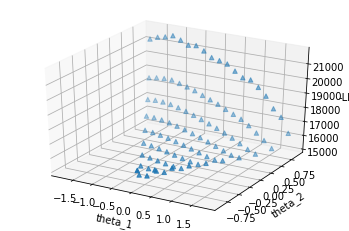

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
llk_dat = ve.gen_plot2q(10)
fig= plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs=llk_dat[:, 0], ys=llk_dat[:, 1], zs=llk_dat[:, 2], marker='^')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('-LLK');
import pandas as pd
pd.DataFrame(llk_dat).describe()


We see below *theta_* is around the grid point where we mave maximum likelihood.

In [0]:
# pd.DataFrame(tt)
print(theta_)
pd.DataFrame(llk_dat).sort_values(by=2).head()

[ 0.02992109 -0.55845733]


,0,1,2
93,0.0,-0.5,15237.729538
96,-0.2,-0.7,15244.348261
89,0.4,-0.3,15256.370592
94,0.2,-0.5,15260.507057
82,0.6,-0.1,15268.106695


We can also plot for $q=1$.

In [0]:
llk_dat_1 = ve.gen_plot1q(20)

,0,1
35,0.75,15273.082964
34,0.70,15280.884864
36,0.80,15281.790406
33,0.65,15299.003744
37,0.85,15318.435910


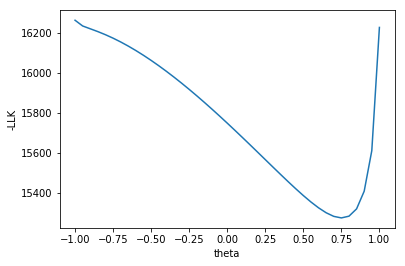

In [0]:

plt.plot(llk_dat_1[:, 0], llk_dat_1[:, 1], )
plt.xlabel('theta')
plt.ylabel('-LLK')
pd.DataFrame(llk_dat_1).sort_values(by=1).head()

So the maximum LLK for $q=1$ is rather close to that of $q=2$ in this case.



## Robusness with respect to dimension and parameters

We created simulated data for $k$ in $(2, 8,12, 15)$, $p$ from $0-4$ and $q$ from $1-4$. For each set of parameters we ran 4 different simulations, the first one with no trend while the rest with trend. The code is in _test.py. Since it takes sometime to run that code we just loaded the output to csv file and plot the input parameters (theta, sigma, mu phi) against the fitted parameters. (Sigma is actually $Omega$, the covariance matrix of Gaussian noise and not the Toeplitz matrix above). The result is in the following:

In [0]:
from numpy import sort

def plot_one_param_set(fname):
  rpt = pd.read_csv(fname, header=0, index_col=0)
  idx_header = ["k", "p", "q", "run_id", "param", "param_out", 'param_pos']
  columns = ['input', 'output', 'diff']

  rpt_good = rpt.loc[~pd.isnull(rpt.output)]
    
  range_p = sort(rpt_good.p.unique())
  range_q = sort(rpt_good.q.unique())
  range_k = sort(rpt_good.k.unique())
  fig = plt.figure()  
  fig, axes = plt.subplots(nrows=range_p.shape[0], ncols=range_q.shape[0], squeeze=False, figsize=(18, 18))
  for p_i in range(range_p.shape[0]):
      for q_i in range(range_q.shape[0]):
          subfrm = rpt_good.loc[(rpt.p == range_p[p_i]) & (rpt.q == range_q[q_i])]
          axes[p_i, q_i].scatter(subfrm.input, subfrm.output)
          axes[p_i, q_i].set_title("k=ALL p=%d q=%d" % (range_p[p_i], range_q[q_i]))
  plt.tight_layout()        
  for k_i in range(range_k.shape[0]):
      rpt_good_k = rpt_good.loc[rpt_good.k == range_k[k_i]]
      range_q = sort(rpt_good_k.q.unique())
      range_p = sort(rpt_good_k.p.unique())
      fig, axes = plt.subplots(nrows=range_p.shape[0], ncols=range_q.shape[0], figsize=(18, 18))
      fig.suptitle("k=%d" % range_k[k_i])
      for p_i in range(range_p.shape[0]):
          for q_i in range(range_q.shape[0]):
              subfrm = rpt_good_k.loc[(rpt.p == range_p[p_i]) & (rpt.q == range_q[q_i])]
              axes[p_i, q_i].scatter(subfrm.input, subfrm.output)
              axes[p_i, q_i].set_title("k=%d p=%d q=%d" % (range_k[k_i], range_p[p_i], range_q[q_i]))
      plt.tight_layout()
  return rpt, rpt_good    

<Figure size 432x288 with 0 Axes>

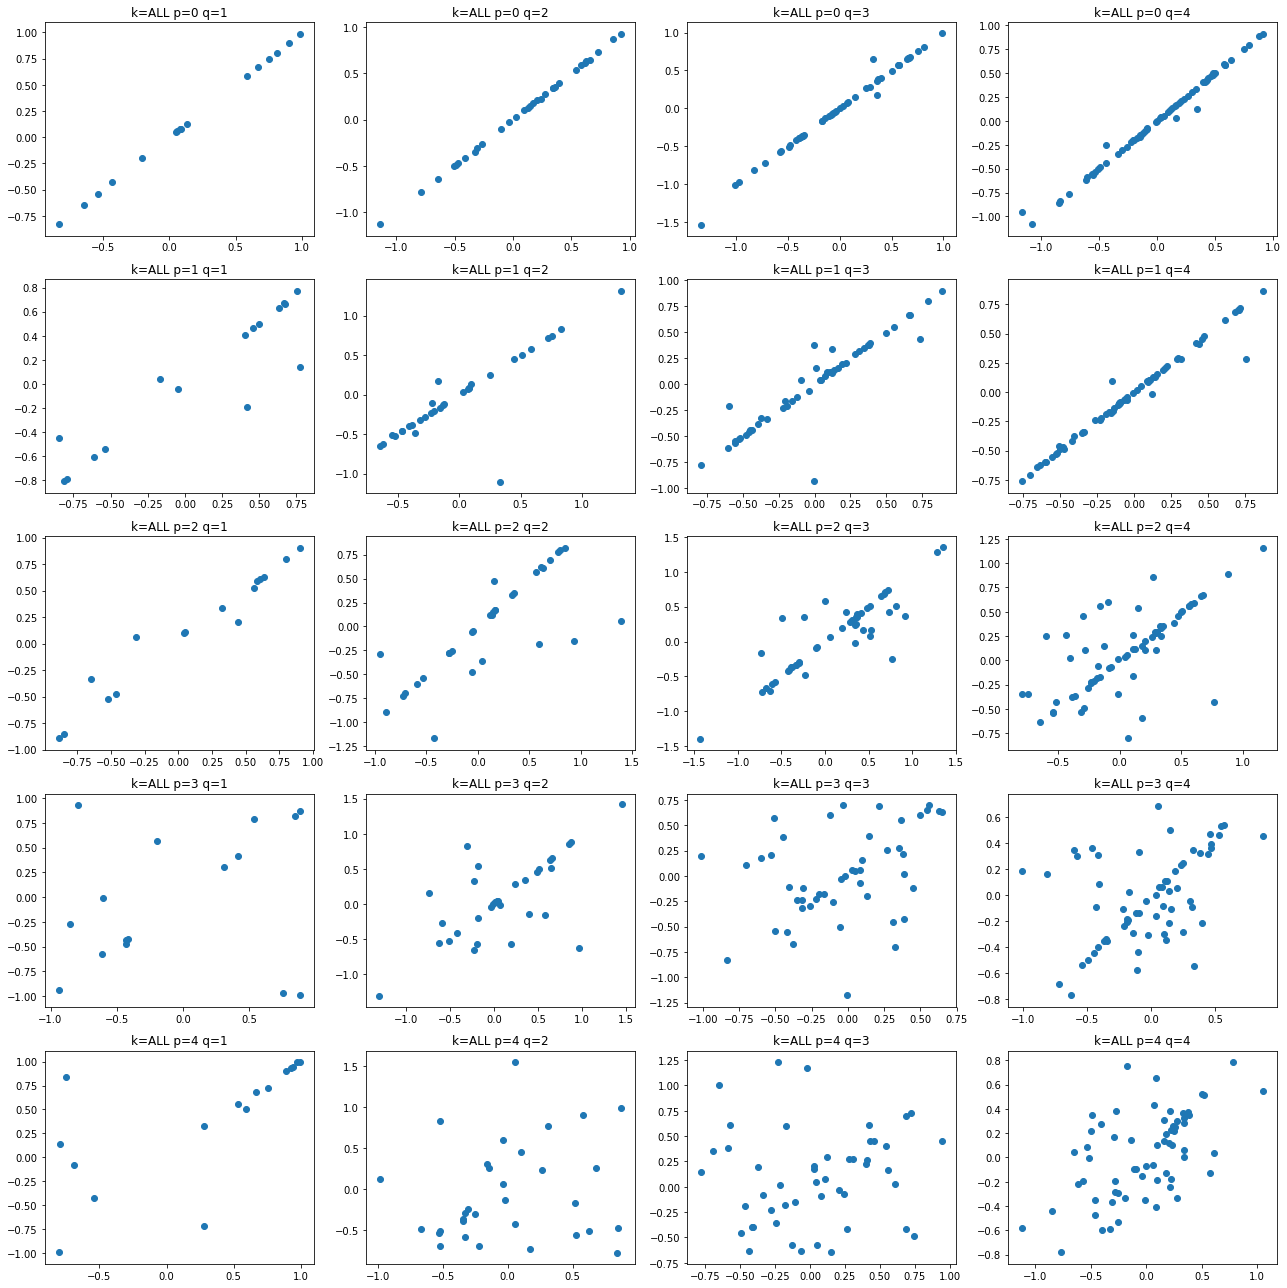

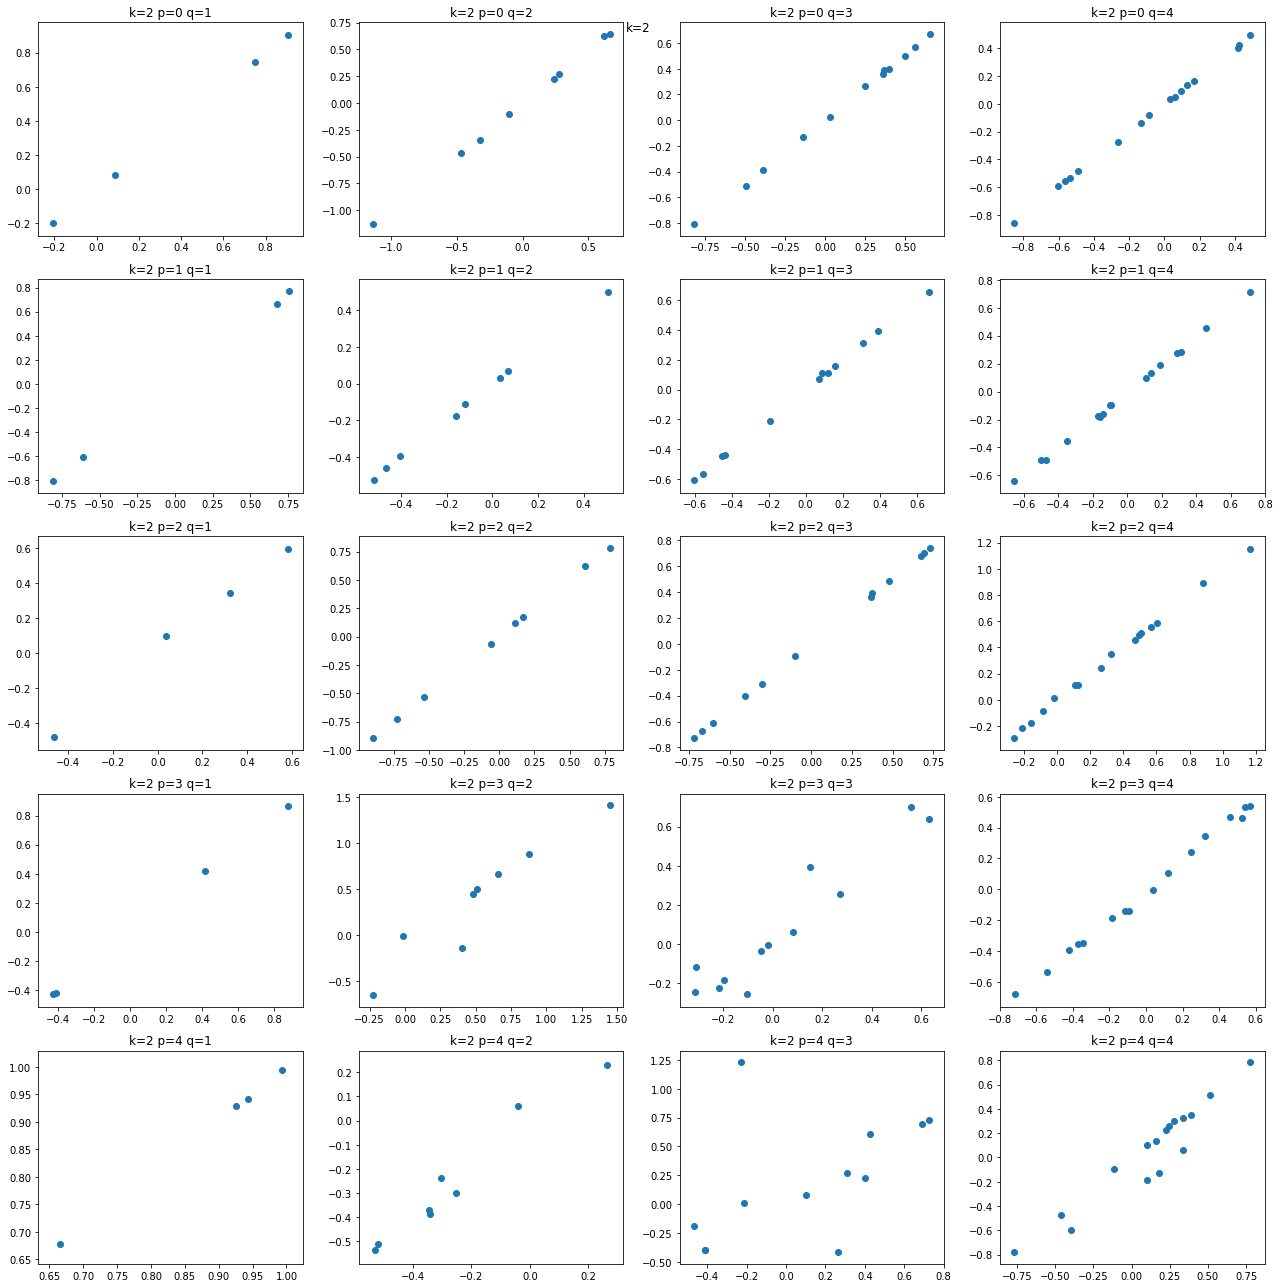

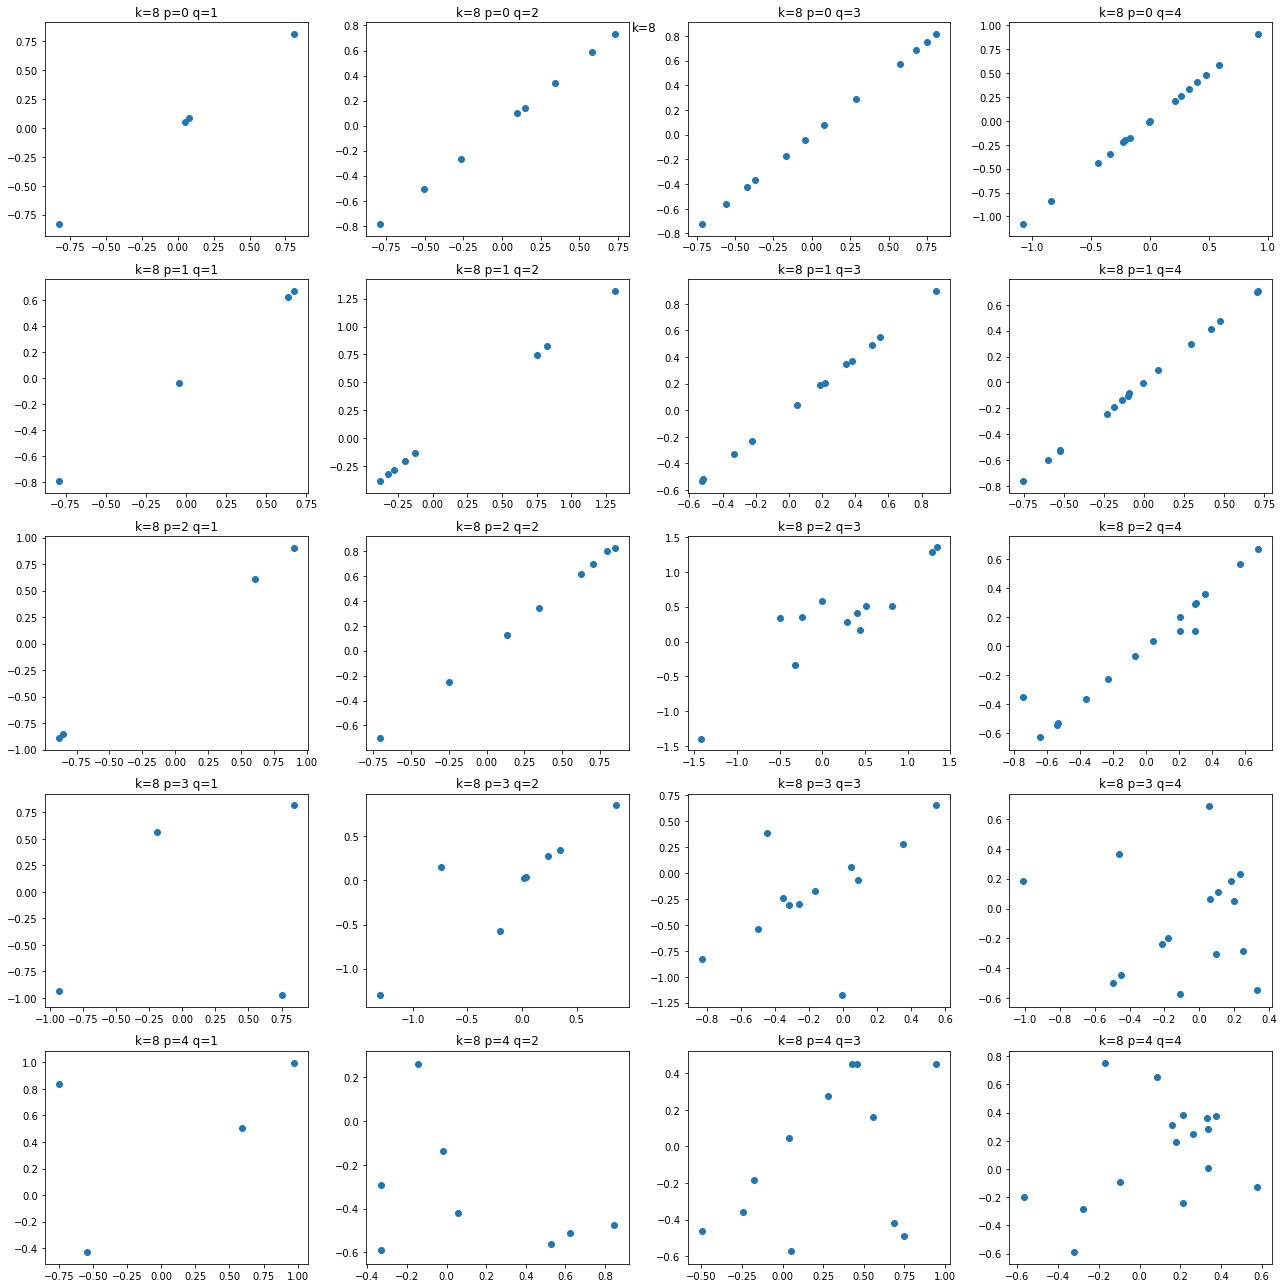

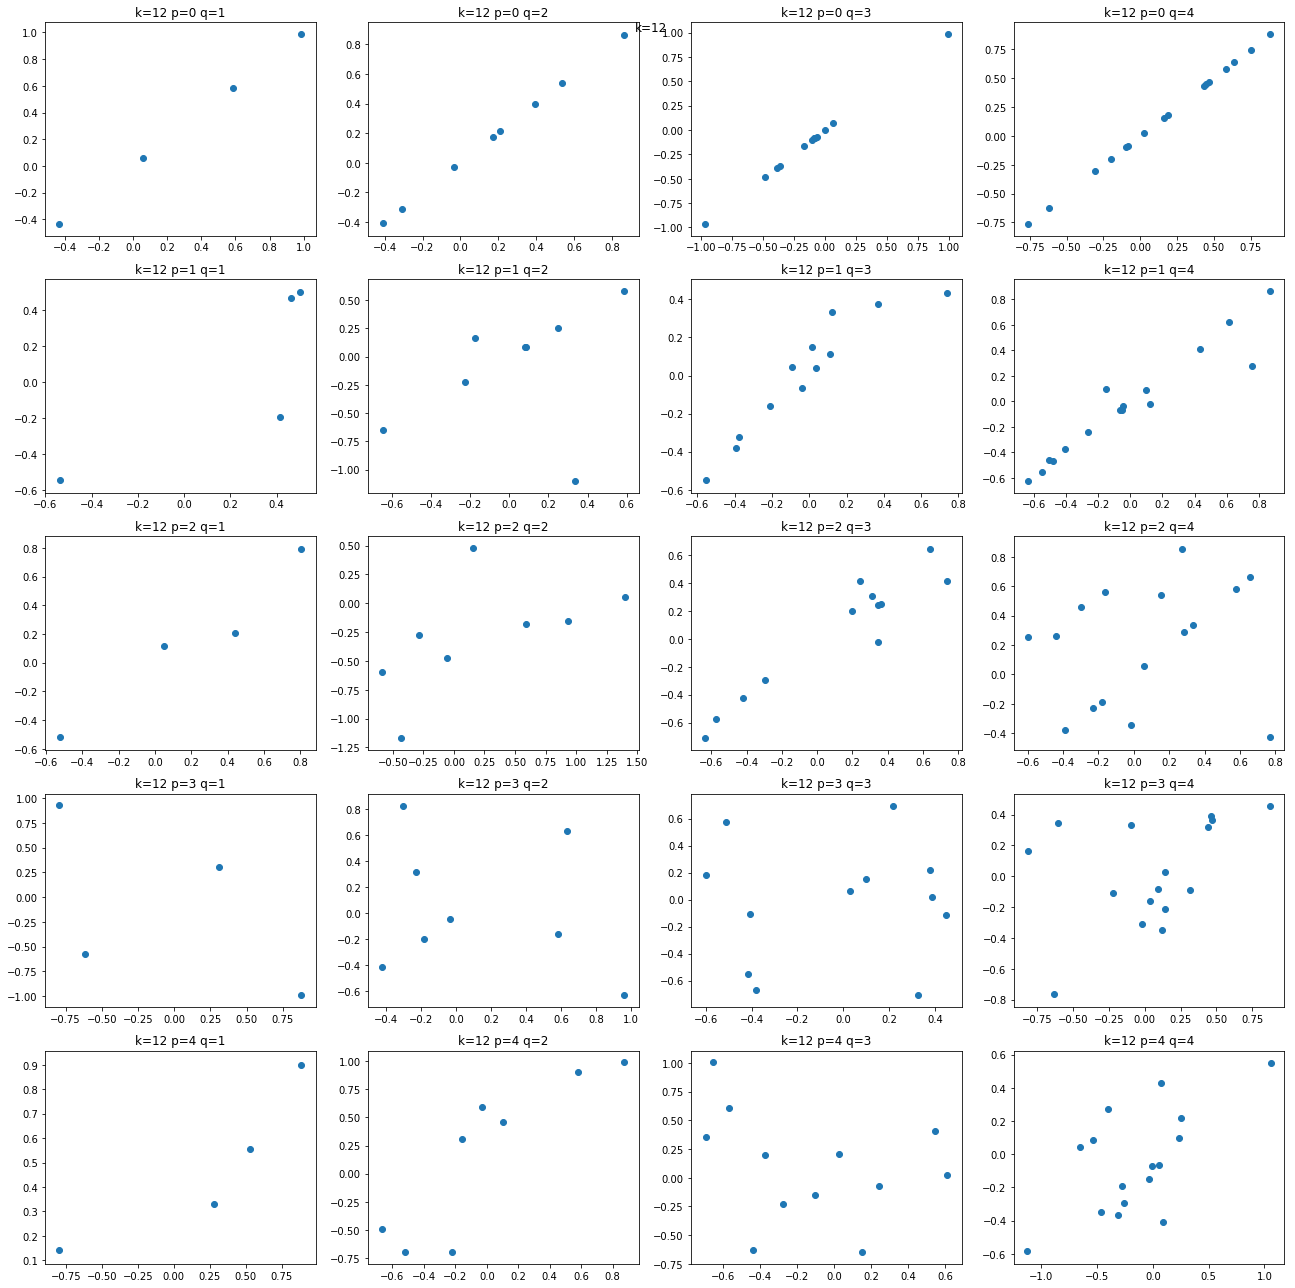

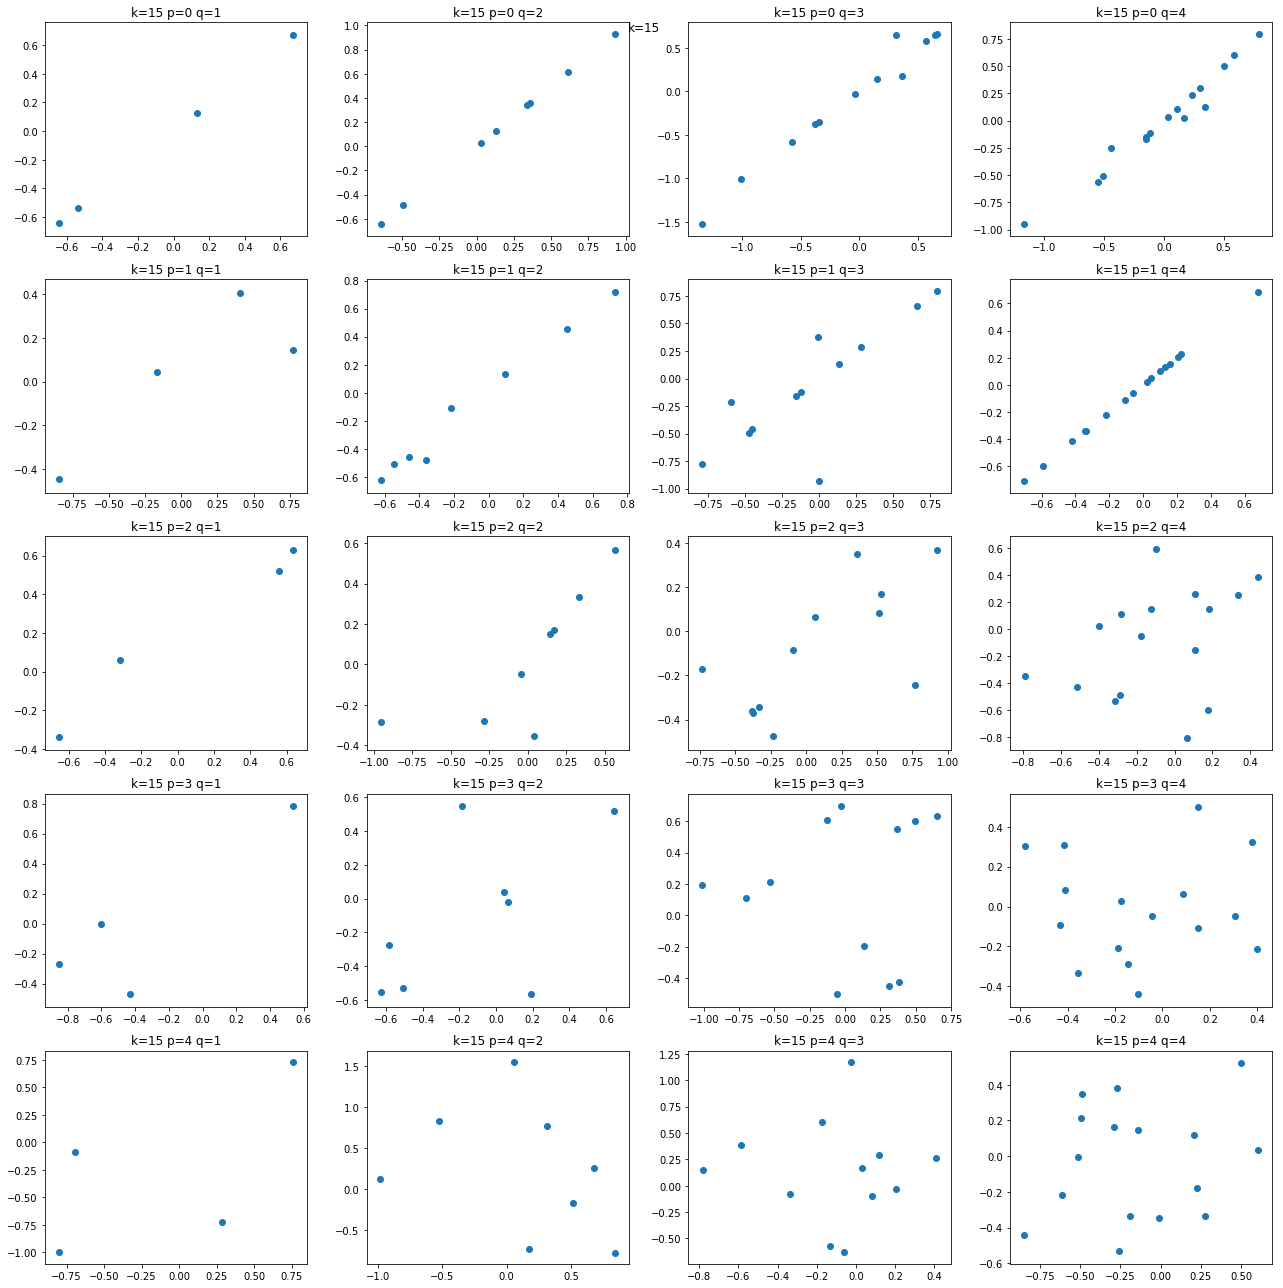

In [0]:
rpt, rpt_good = plot_one_param_set('VARsMA/data/theta.csv')

We see for large $p$ theta seems to be all over the place. However this is probably because of the dynamic between theta, mu and q: We see in all cases fitted $sigma$ is tracks input very well. We also show that predicted $X$ and out sample simulated $X$ also track.

<Figure size 432x288 with 0 Axes>

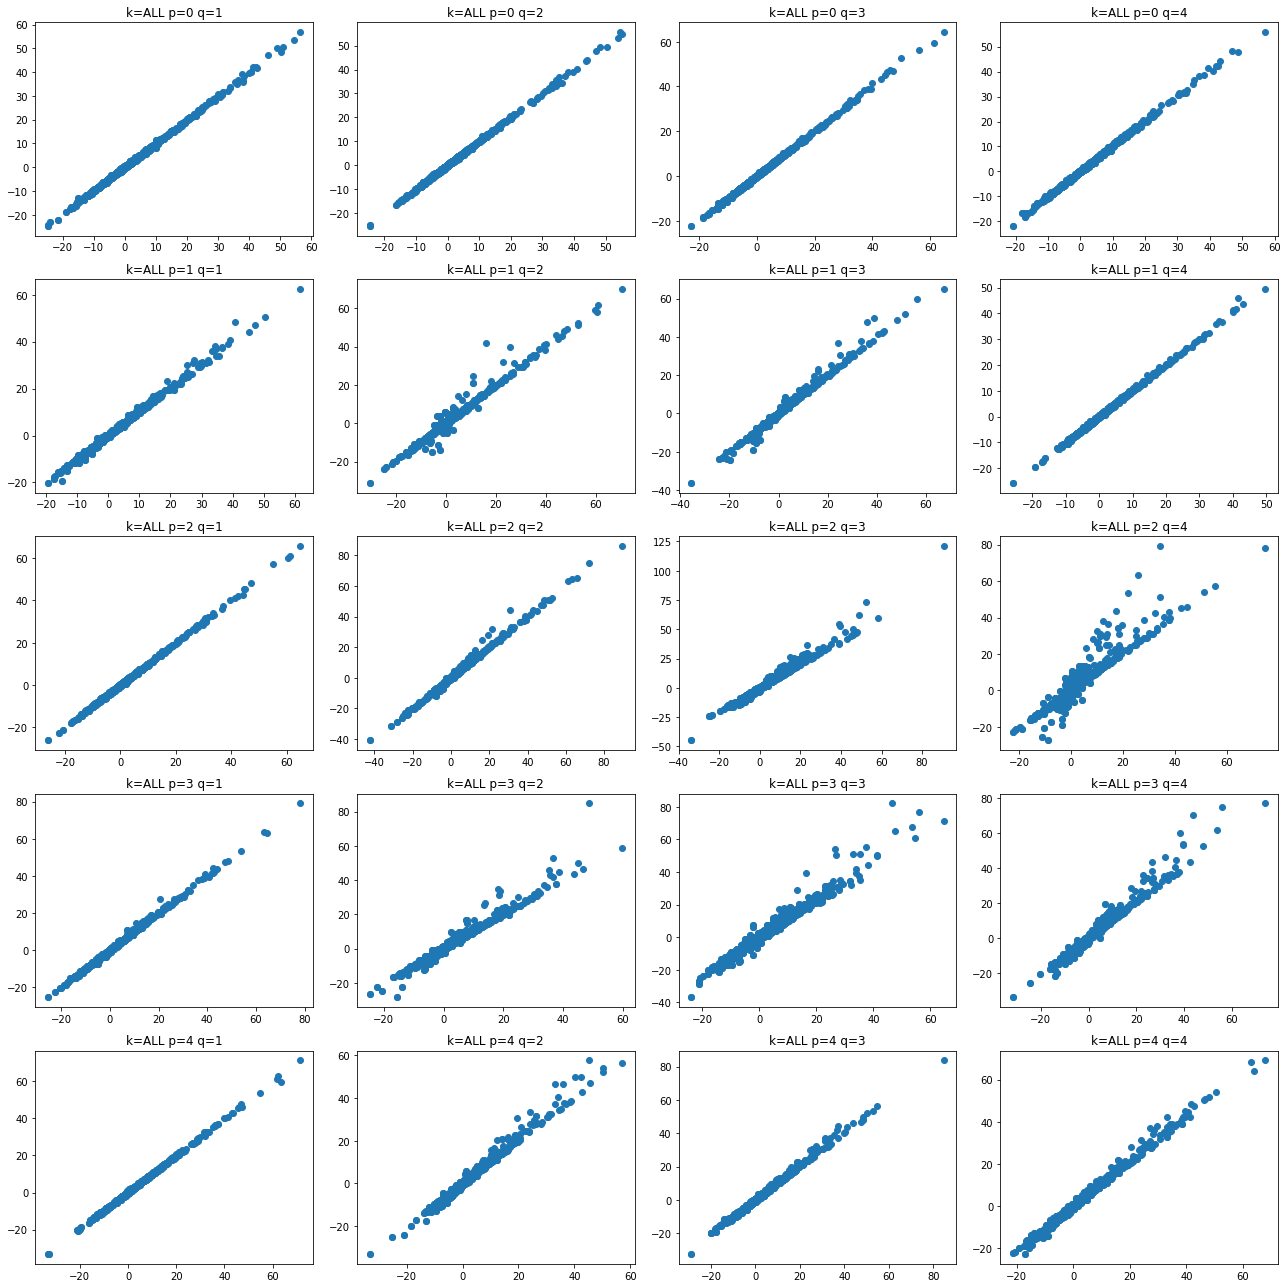

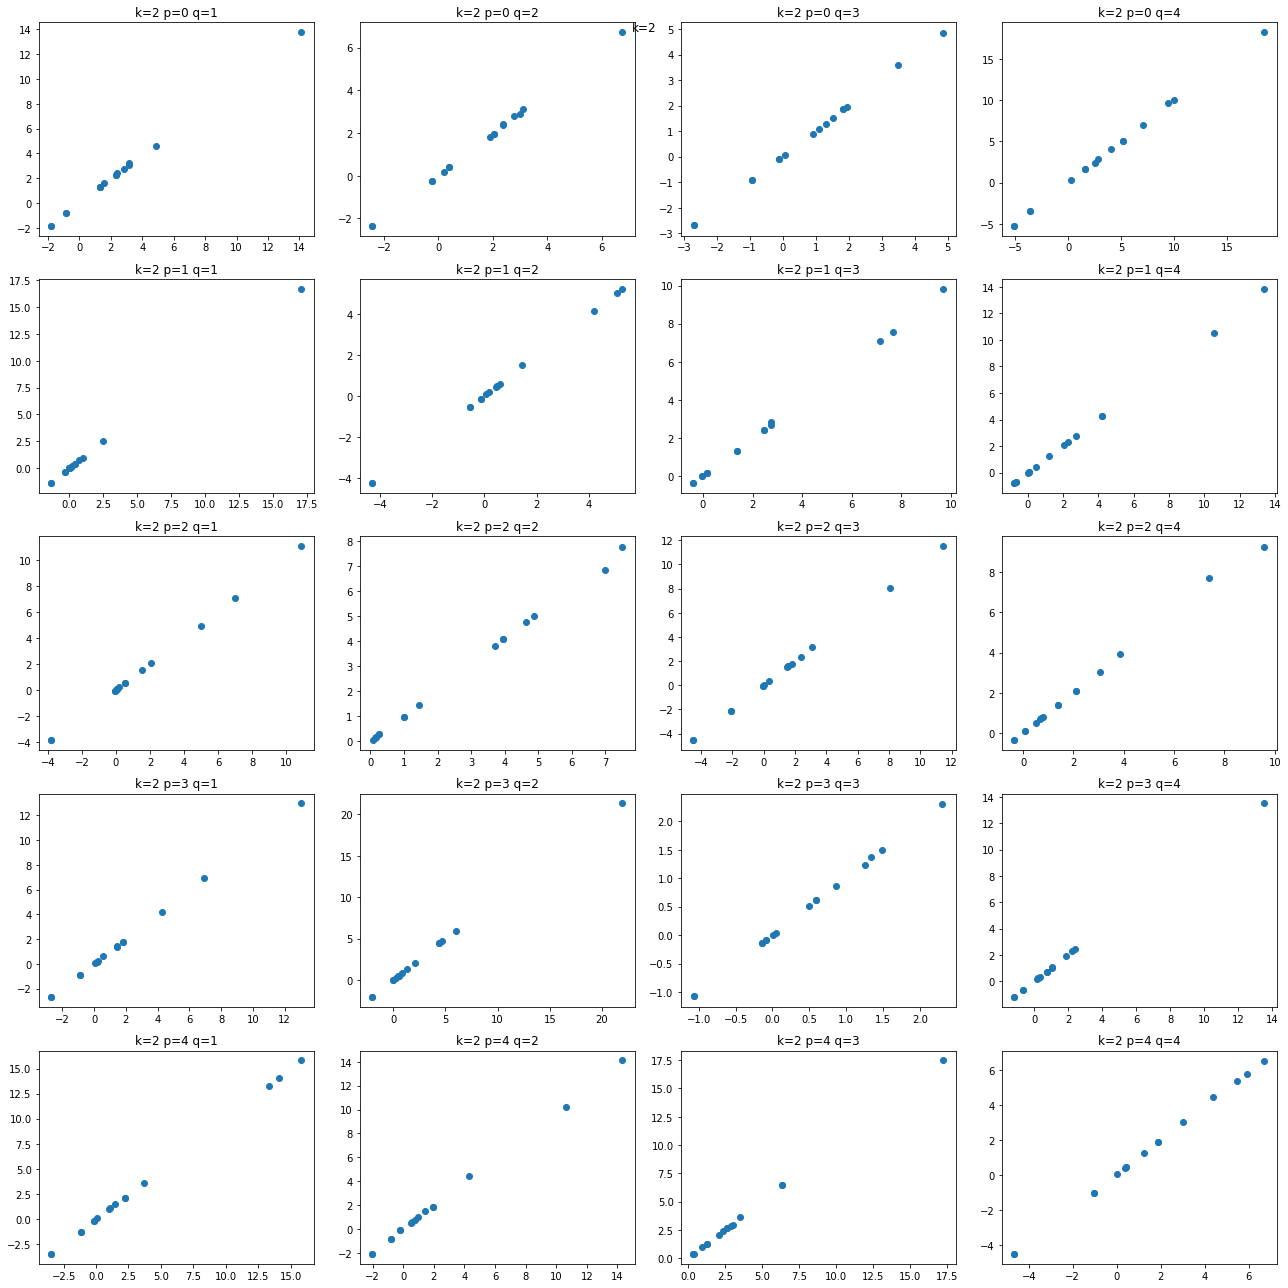

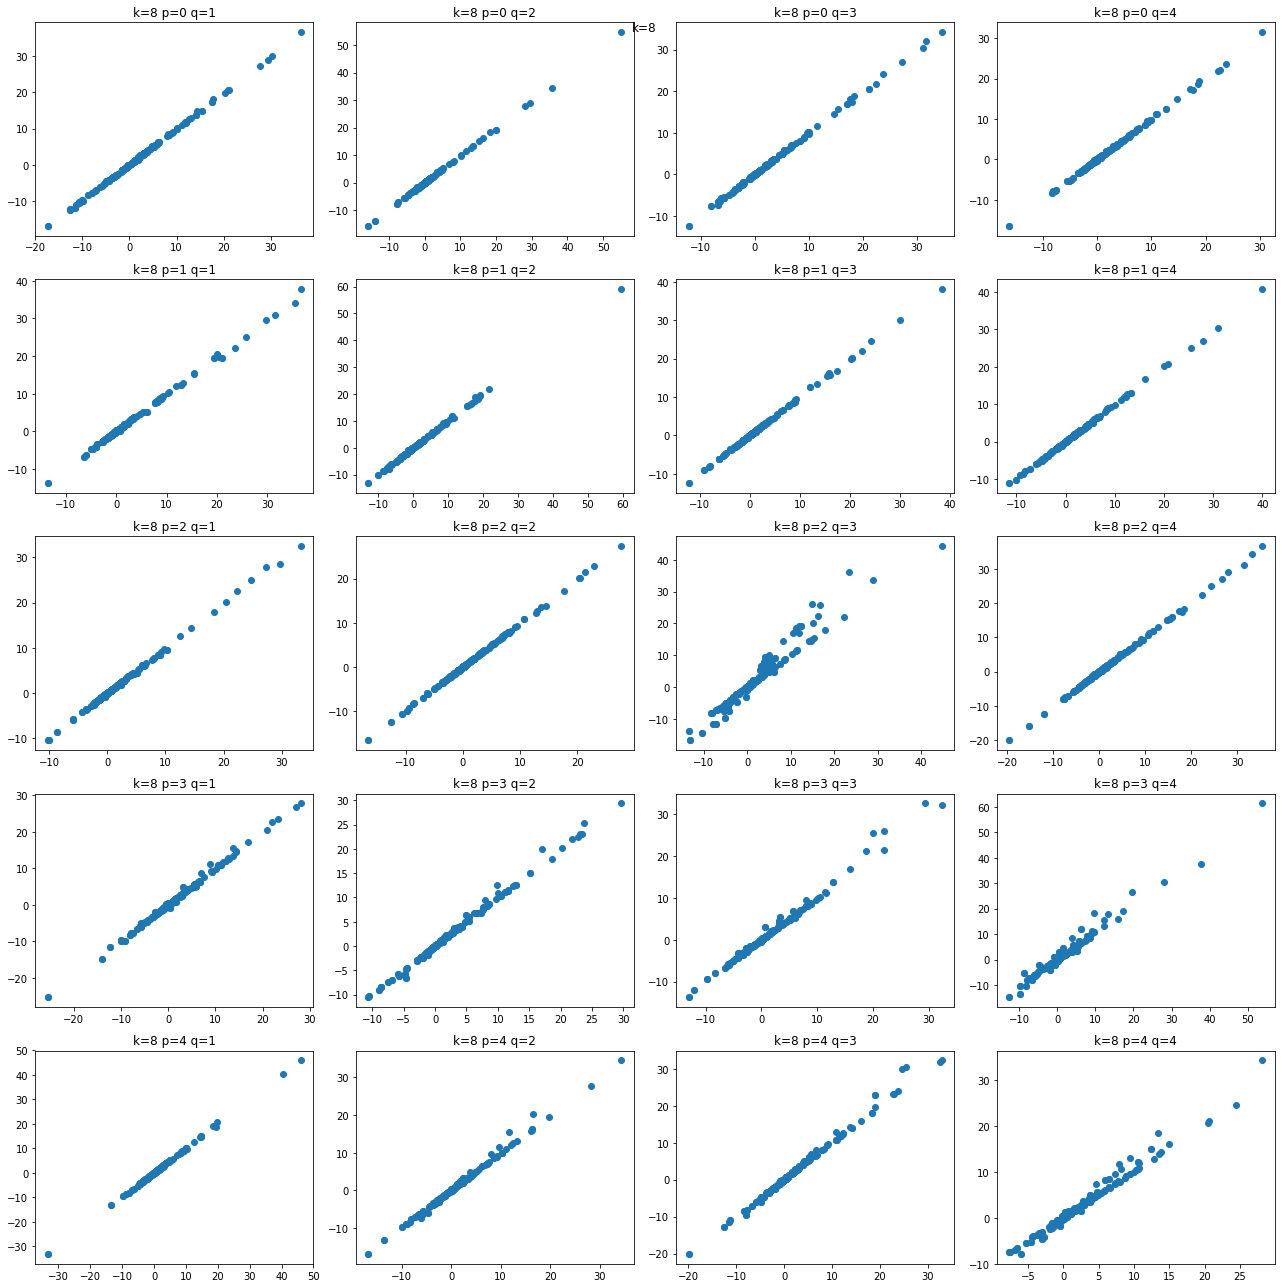

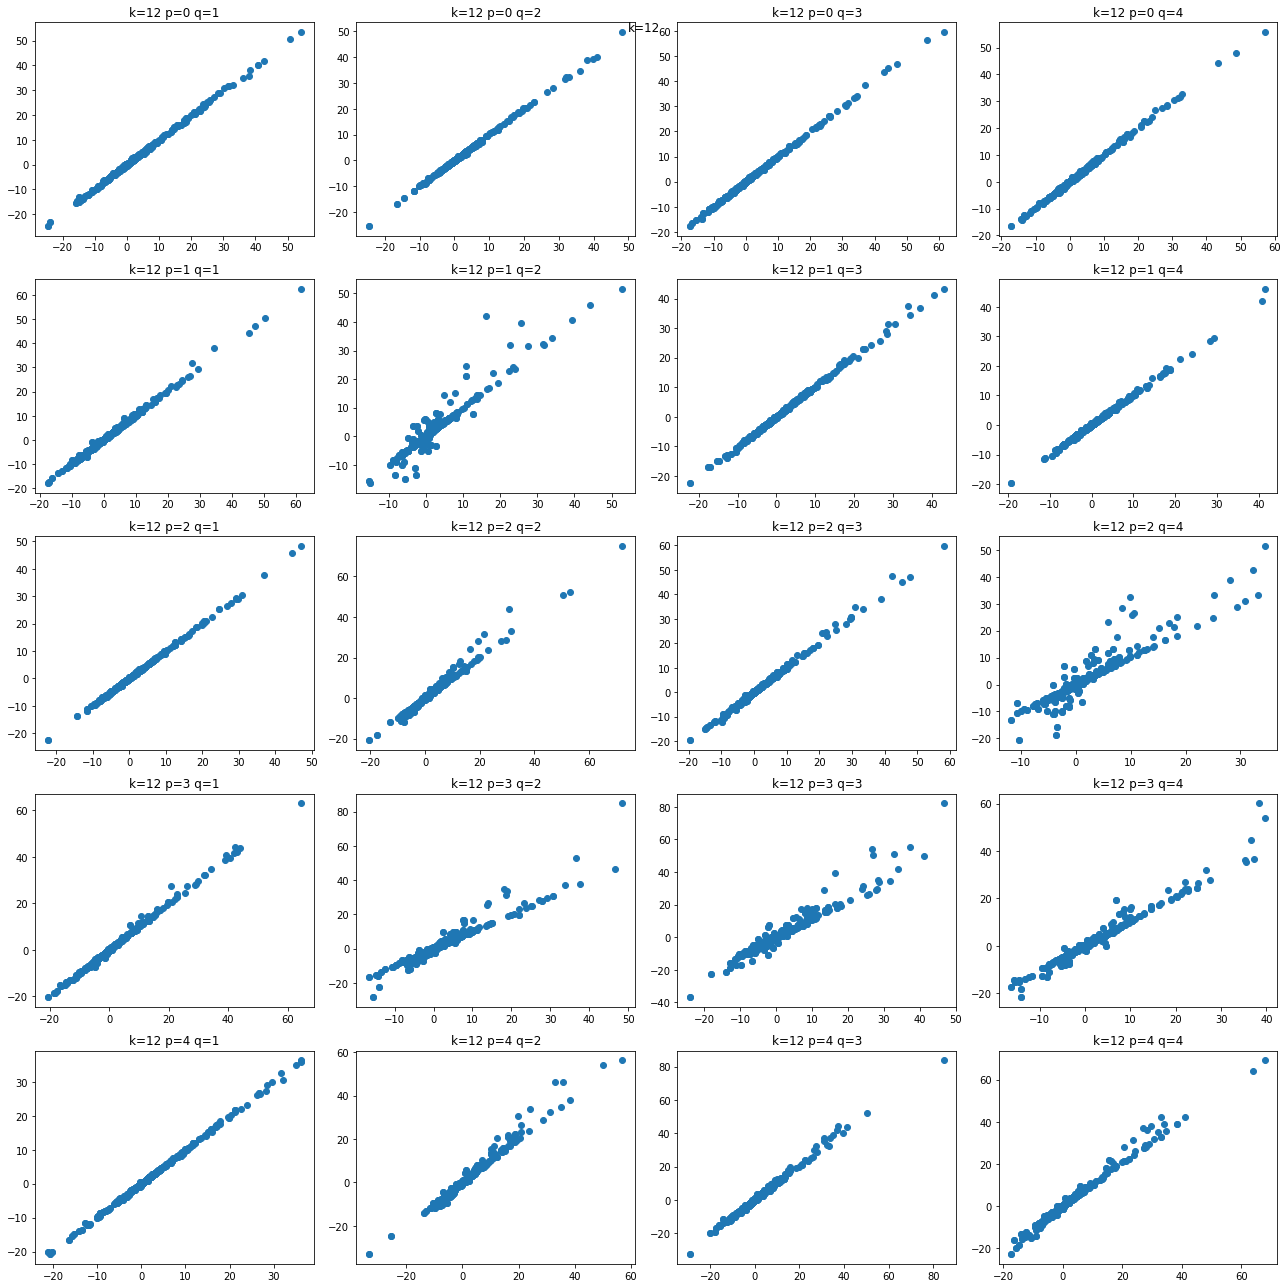

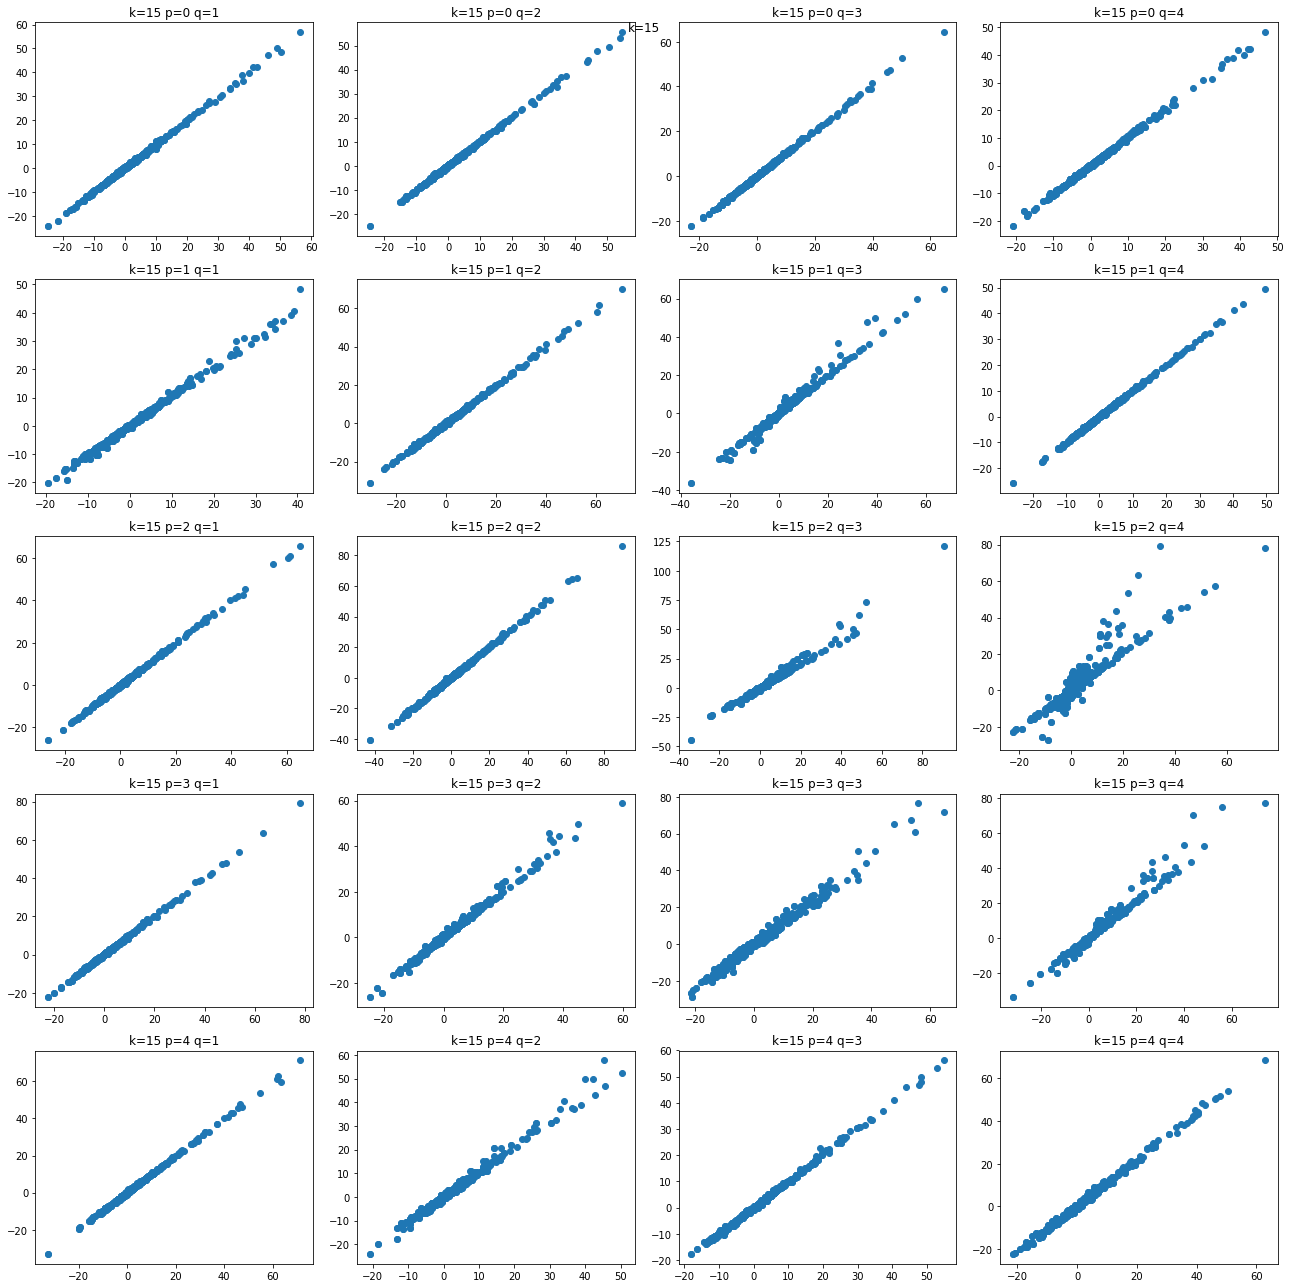

In [0]:
rpt, rpt_good = plot_one_param_set('VARsMA/data/sigma.csv')

## Further direction: Seasonality/CoIntegration and Long Memory Vector Process.
This result should follow without much change for if we take to account seasonality or dealing with cointegration.

The original Borodin-Okounkov's formula was for infinite dimensional Toeplitz matrix. The GLS result also works for any scalar $MA$ component. So if we take the $MA$ component to be a fractional power, for example $(1 - L)^{-d}(1+\theta L)$ we have a long memory vector process that could be estimated by a similar method. So we may be able to model data with long memory process at the cost of two parameters, $\theta$ and $d$. $\Sigma_T$ is harder to invert but still tractable.

## References
1. Du Nguyen. Vector Autoregressive model with scalar Moving Average Component. In preparation.
2. James D. Hamilton. Time series Analysis. Princeton University Press.
3. A. Borodin and A. Okounkov: A Fredholm determinant formula for Toeplitz determinants. Integral Equations Operator Theory 37 (2000), 386-396.